In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, uniform, binom, expon
import scipy.stats as stats


# Wstęp

Rozkłady danych to sposób, w jaki wartości zmiennej losowej (czyli wyników pomiarów, eksperymentów lub obserwacji) są rozproszone lub rozmieszczone. Mówiąc o rozkładach danych, odnosimy się do tego, jak często różne wartości występują w zbiorze danych. Inaczej mówiąc, rozkład to sposób przedstawienia prawdopodobieństwa przyjęcia przez zmienną losową różnych wartości."

Wartość oczekiwana -  wartość, którą zmienna ta przyjmuje średnio, gdyby eksperyment powtarzany był w nieskończoność.

Wariancja - miara zmienności 

Odchylenie - miara rozproszenia

Funkcja prawdopodobieństwa (PDF) - Dla rozkładu ciągłego, PDF mówi nam, jak gęsto rozłożone są wartości zmiennej losowej. 

Dla rozkładu dyskretnego odpowiada funkcja masy prawdopodobieństwa (PMF), która przypisuje prawdopodobieństwo do poszczególnych punktów.

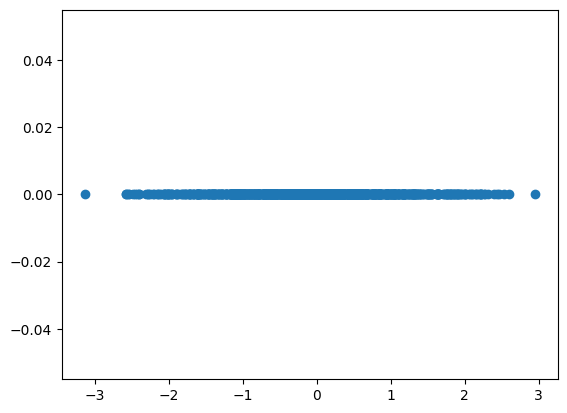

In [70]:
data = np.random.normal(loc=0, scale=1, size=1000)
y = np.zeros_like(data)
plt.scatter(data, y)

Text(0, 0.5, 'Częstość')

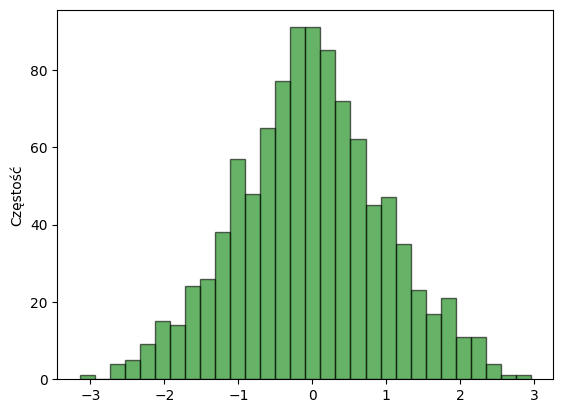

In [71]:
count, bins, ignored = plt.hist(data, bins=30, density=False, alpha=0.6, color='g', edgecolor='black')
plt.ylabel('Częstość')


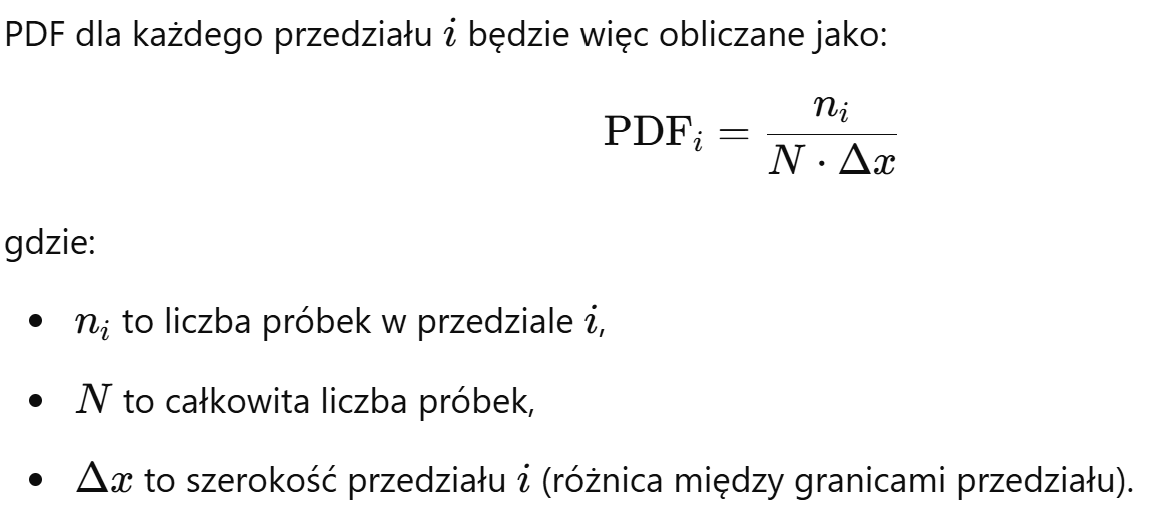

Text(0, 0.5, 'Gęstość')

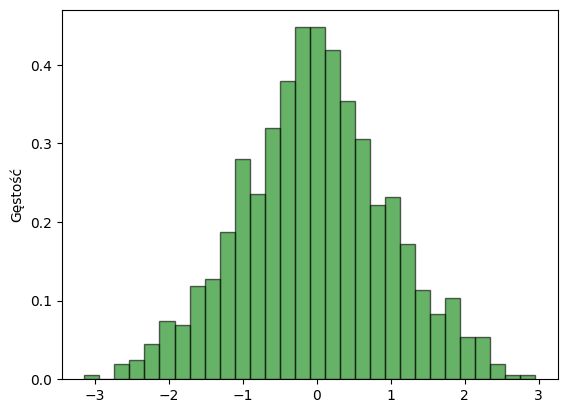

In [72]:
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.ylabel('Gęstość')

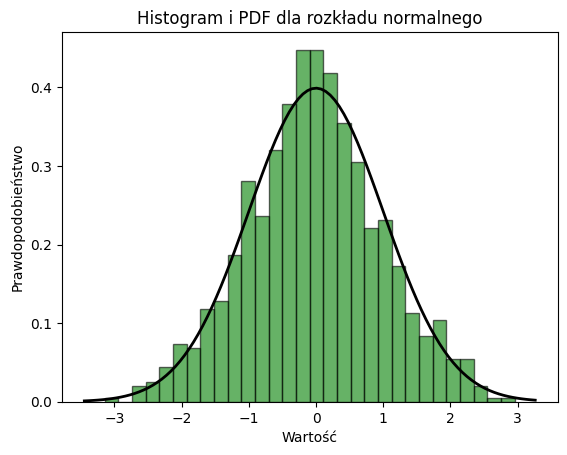

In [73]:
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

mu, sigma = 0, 1
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k', linewidth=2)
plt.title("Histogram i PDF dla rozkładu normalnego")
plt.xlabel("Wartość")
plt.ylabel("Prawdopodobieństwo")
plt.show()


# ROZKŁADY 

### ROZKŁADY NORMALNE

- Średnią (μ)
- Odchylenie standardowe (σ) - im większe tym dzwon bardziej płaski
- modelowanie wzrostu wagi lub wzrostu


 
​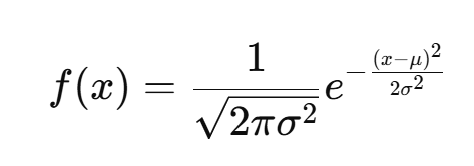


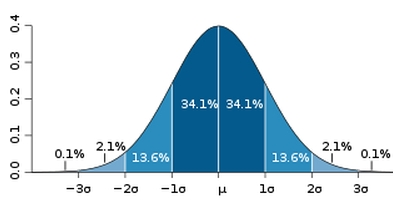

In [95]:
mu, sigma = 0, 1  # średnia, odchylenie standardowe
x_normal = np.linspace(-5, 5, 1000)
y_normal = norm.pdf(x_normal, mu, sigma)

Text(0, 0.5, 'Prawdopodobieństwo')

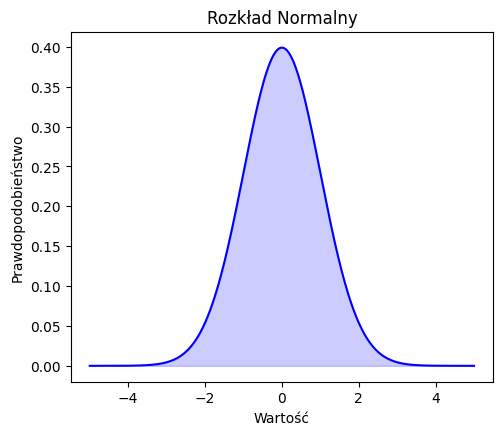

In [96]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(x_normal, y_normal, label="Normalny", color="blue")
plt.fill_between(x_normal, y_normal, alpha=0.2, color="blue")
plt.title("Rozkład Normalny")
plt.xlabel("Wartość")
plt.ylabel("Prawdopodobieństwo")

### ROZKŁAD DWUMIANOWY

- ile razy trafie do kosza w 10 próbach

- n - liczba obserwacji
- k - liczba sukcesów

- każda próba niezależna
- prawd. w każdej próbie stałe 
- każda próba kończy się porażką lub sukcesem


 -> ZMIENNA LOSOWA TO LICZBA SUKCESÓW W n PRÓBACH

E[X] = np 

Var(X) = np(1-p)

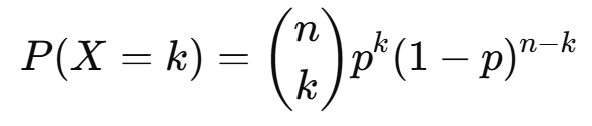

https://www.youtube.com/watch?v=6YzrVUVO9M0&t=317


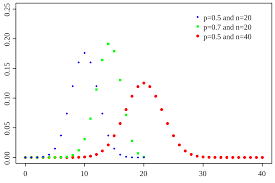

In [76]:
n, p = 10, 0.5  # liczba prób, prawdopodobieństwo sukcesu
x_binom = np.arange(0, n+1)
y_binom = binom.pmf(x_binom, n, p)

Text(0, 0.5, 'Prawdopodobieństwo')

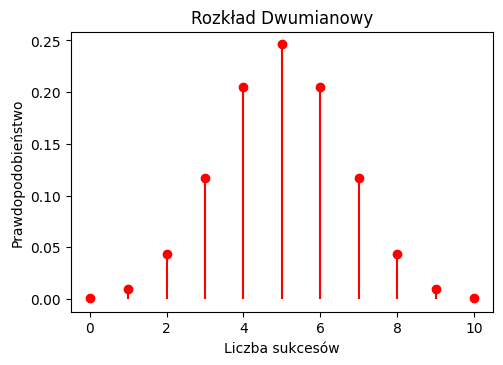

In [77]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
plt.stem(x_binom, y_binom, label="Dwumianowy", basefmt=" ", linefmt="red", markerfmt="or")
plt.title("Rozkład Dwumianowy")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")

### ROZKŁAD WYKŁADNICZY

Rozkład opisuje czas między kolejnymi niezależnymi zdarzeniami przypadkowymi. 

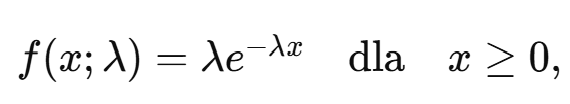

- \( x \) to czas lub inna zmienna,
- \( λ \) określa intensywność procesu/zdarzeń 

Średnia: 1/λ

Wariancja 1/λ^2



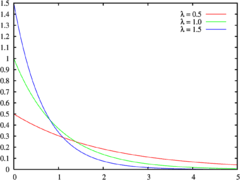

In [78]:
# Parametr lambda dla rozkładu wykładniczego
lambda_exp = 1.5  # Intensywność zdarzeń

# Zakres wartości x
x_exp = np.linspace(0, 5, 100)
y_exp = expon.pdf(x_exp, scale=1 / lambda_exp)  # PDF rozkładu wykładniczego

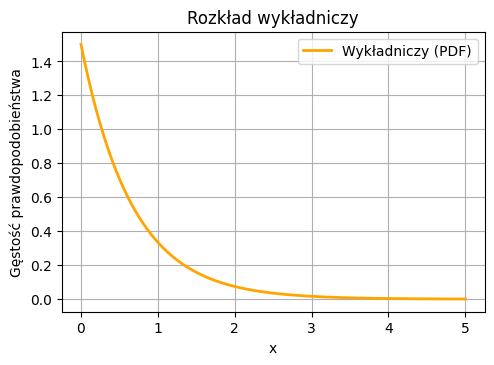

In [79]:
# Wykres rozkładu wykładniczego
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.plot(x_exp, y_exp, label="Wykładniczy (PDF)", color="orange", lw=2)
plt.title("Rozkład wykładniczy")
plt.xlabel("x")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.grid()

### ROZKŁAD POISSONA

- Liczba telefonów przychodzących do centrali w ciągu godziny.
- Liczba wypadków na danym odcinku drogi w określonym czasie.


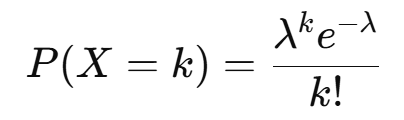

- \( X \) to liczba zdarzeń (zmienna losowa),
- \( k \) to konkretna liczba zdarzeń (\( k = 0, 1, 2, ...
\)),
- \( λ \) to średnia liczba zdarzeń w przedziale (tzw. intensywność zdarzeń),

Średnia rozkładu wynosi: E[X] = λ.

Wariancja również wynosi: Var(X) = λ

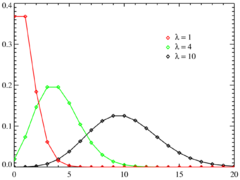

In [80]:
lambda_poisson = 5  # średnia liczba zdarzeń
x_poisson = np.arange(0, 15)
y_poisson = poisson.pmf(x_poisson, lambda_poisson)

Text(0, 0.5, 'Prawdopodobieństwo')

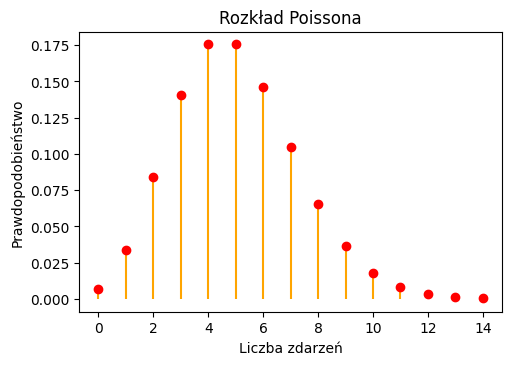

In [81]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.stem(x_poisson, y_poisson, label="Poissona", basefmt=" ", linefmt="orange", markerfmt="or")
plt.title("Rozkład Poissona")
plt.xlabel("Liczba zdarzeń")
plt.ylabel("Prawdopodobieństwo")

### ROZKŁAD RÓWNOMIERNY

- Symulacje komputerowe: Generowanie liczb losowych w określonym przedziale.

- Analiza ryzyka: Modelowanie sytuacji, gdzie wszystkie scenariusze mają jednakowe prawdopodobieństwo.

- dany przedział 

- E[X] = (A+B)/2

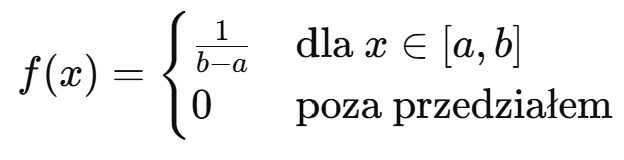

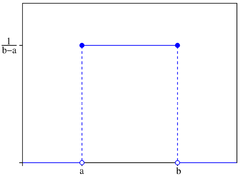

CZEMU g(x) = 1/b-a   -> pole pod wykresem od funkcji gęstości musi być 1 

In [101]:
a, b = 0, 1  # granice rozkładu
x_uniform = np.linspace(a, b, 1000)
y_uniform = uniform.pdf(x_uniform, a, b-a)

Text(0, 0.5, 'Prawdopodobieństwo')

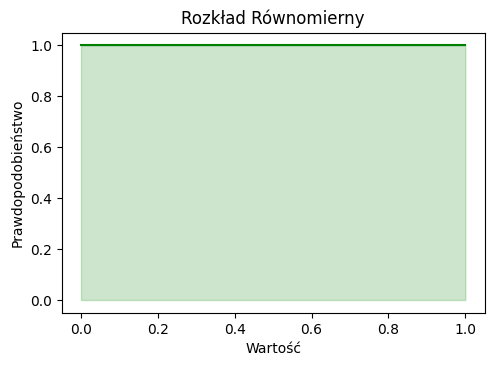

In [102]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.plot(x_uniform, y_uniform, label="Równomierny", color="green")
plt.fill_between(x_uniform, y_uniform, alpha=0.2, color="green")
plt.title("Rozkład Równomierny")
plt.xlabel("Wartość")
plt.ylabel("Prawdopodobieństwo")

# Dystrybuanta - CDF - CUMULATIVE DENSITY FUNCTION


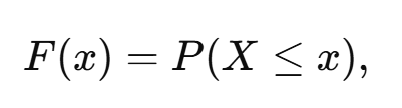

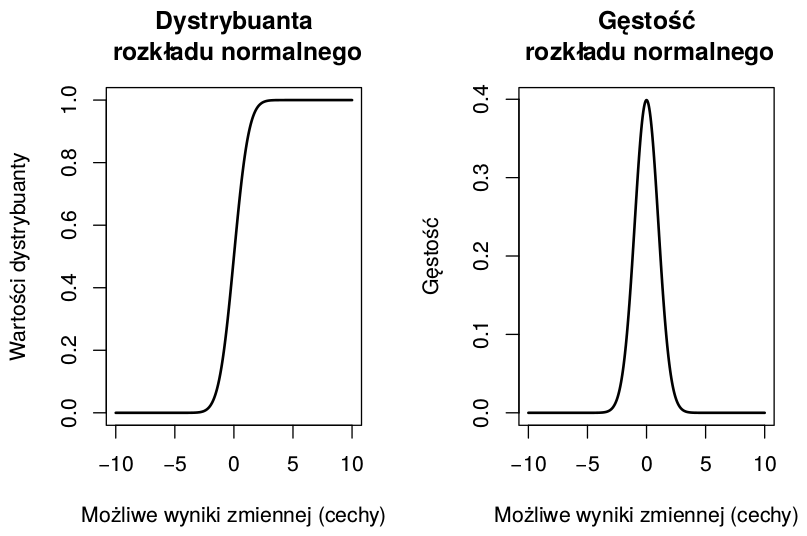

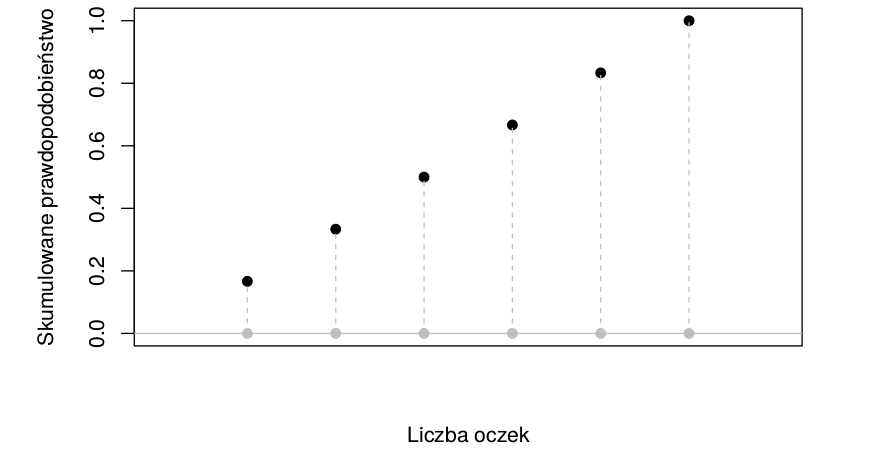

# PPF - Probability Point Function - inverse of the CDF

https://www.youtube.com/watch?v=3VYupIsbLlY

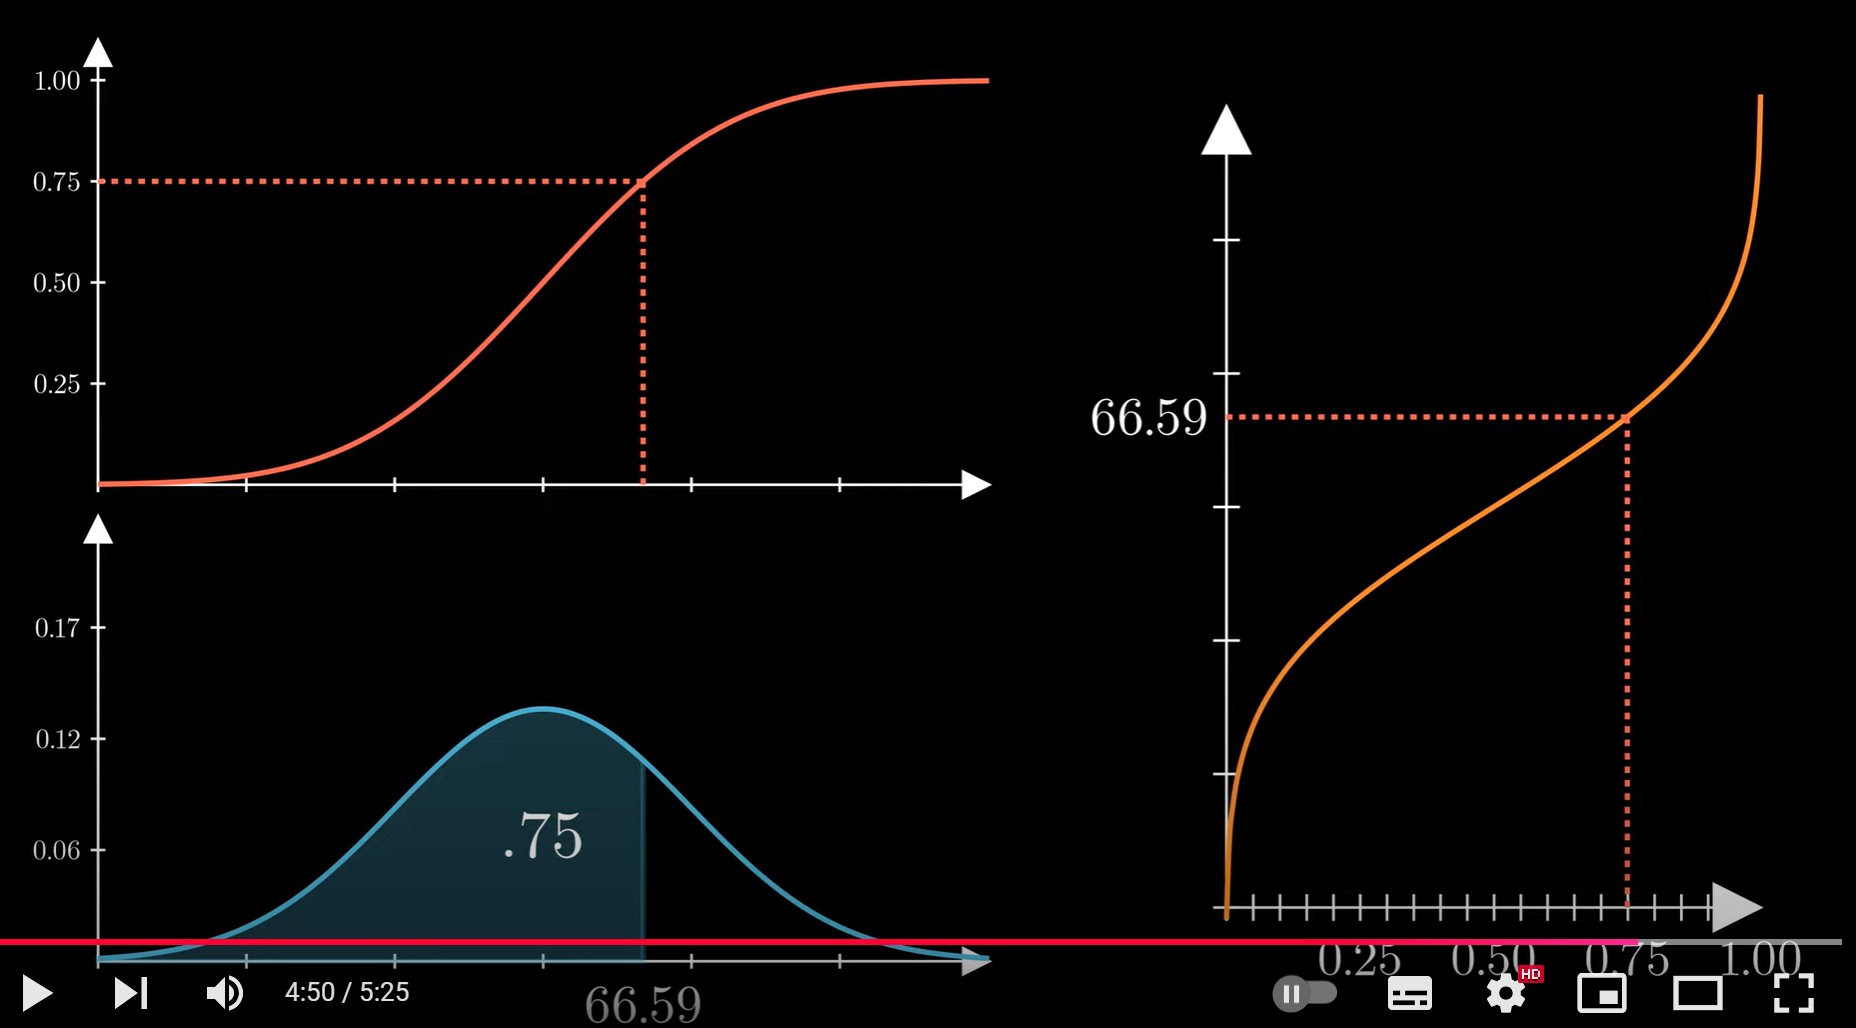

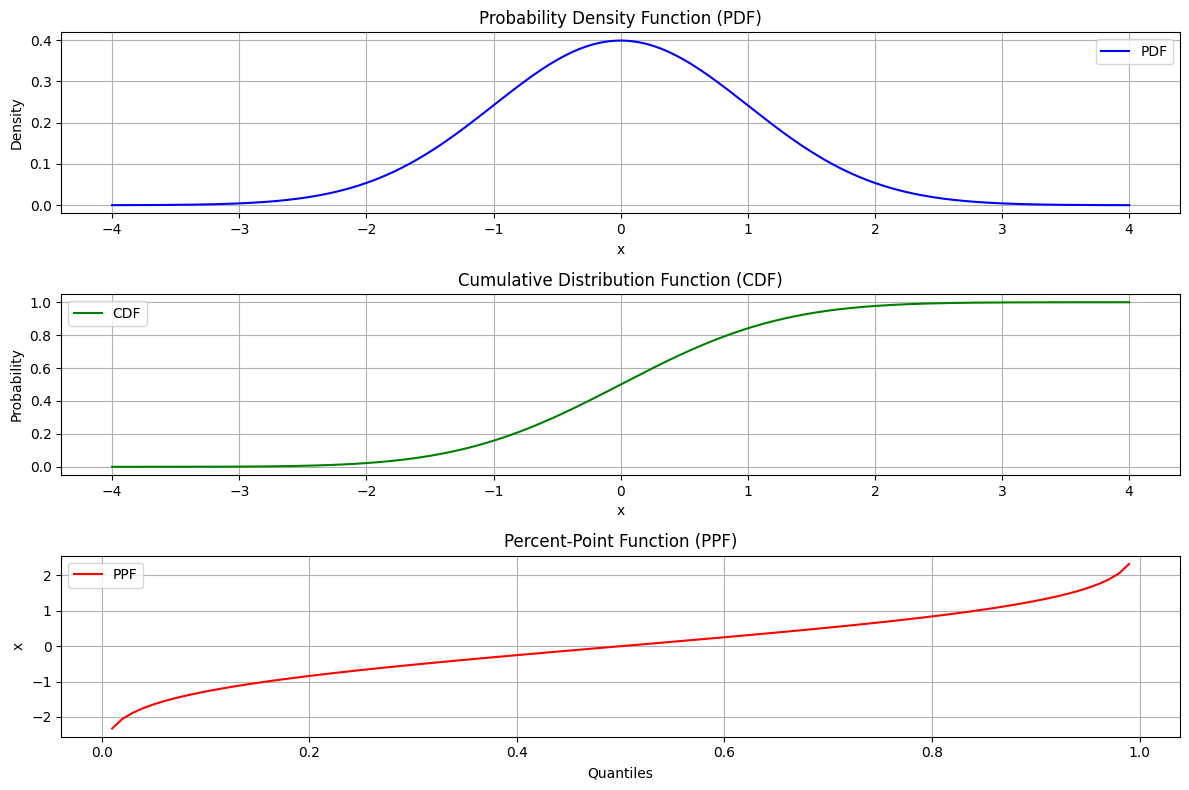

In [84]:
x = np.linspace(-4, 4, 1000)  # Przedział dla PDF i CDF
quantiles = np.linspace(0.01, 0.99, 100)  # Przedział dla PPF (wartości percentylowe)

mu = 0
sigma = 1

# PDF (Probability Density Function)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# CDF (Cumulative Distribution Function)
cdf = norm.cdf(x, loc=mu, scale=sigma)

# PPF (Percent-Point Function, czyli kwantyle)
ppf = norm.ppf(quantiles, loc=mu, scale=sigma)

plt.figure(figsize=(12, 8))

# Wykres PDF
plt.subplot(3, 1, 1)
plt.plot(x, pdf, label="PDF", color="blue")
plt.title("Probability Density Function (PDF)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid()
plt.legend()

# Wykres CDF
plt.subplot(3, 1, 2)
plt.plot(x, cdf, label="CDF", color="green")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.grid()
plt.legend()

# Wykres PPF
plt.subplot(3, 1, 3)
plt.plot(quantiles, ppf, label="PPF", color="red")
plt.title("Percent-Point Function (PPF)")
plt.xlabel("Quantiles")
plt.ylabel("x")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


1. PDF jest funkcją, która opisuje, jak rozłożone są wartości zmiennej losowej. Dla rozkładów ciągłych PDF daje gęstość prawdopodobieństwa w różnych punktach.

2. CDF to funkcja, która mówi, jak duże jest prawdopodobieństwo, że zmienna losowa przyjmie wartość mniejszą lub równą pewnej liczbie x.

3. PPF to funkcja odwrotna do CDF. Dla zadanego prawdopodobieństwa p, PPF daje wartość x, dla której CDF wynosi p.

# Dopasowanie modelu do danych

### WIARYGODNOŚĆ (LIKELIHOOD) VS PRAWDOPODOBIEŃSTWO (PROBABILITY)

Prawdopodbieństwo - mierzy jak bardzo możliwe jest, że dane zdarzenie wystąpi 

Wiarygodność - kryterium jakości modelu - prawd. że przy takich parametrach będą takie dane P(X|THETA)

Problem: Mamy dane z rozkładu normalnego i chcemy znaleźć parametry średniej i odchylenia tak aby model był jak najlepiej dopasowany 

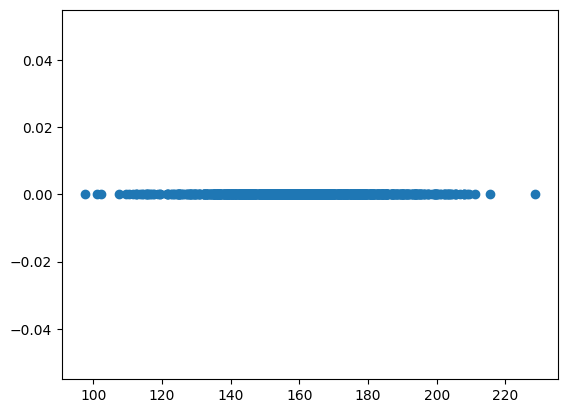

In [85]:
data = np.random.normal(loc=160, scale=20, size=1000)
y = np.zeros_like(data)
plt.scatter(data, y)

Wzór na funkcje wiarygodności: 

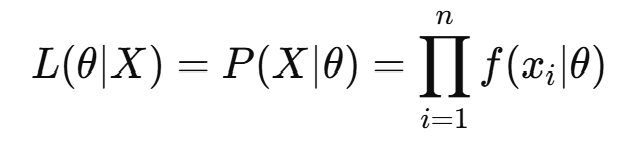

WAŻNE : 
- zakładamy że pomiary są niezależne od siebie - po to aby móc przejść na iloczyn (ROZKŁAD ŁĄCZNY)
- theta reprezentuje parametry czyli u nas średnią i odchylenie

f(x 
i
​
 ∣θ) to funkcja gęstości prawdopodobieństwa (w przypadku rozkładu ciągłego) lub funkcja masy prawdopodobieństwa (w przypadku rozkładu dyskretnego) dla 
𝑥
𝑖
x 
i
​
  przy parametrach 
𝜃
θ.

### MAX WIARYGODNOŚĆ

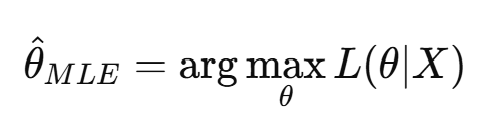

In [86]:
# Estymacja MLE dla średniej (mu)
mu_hat = np.mean(data)

# Estymacja MLE dla odchylenia standardowego (sigma)
sigma_hat = np.sqrt(np.mean((data - mu_hat) ** 2))

print(f"Estymacja średniej (mu): {mu_hat}")
print(f"Estymacja odchylenia standardowego (sigma): {sigma_hat}")

Estymacja średniej (mu): 160.97876627103764
Estymacja odchylenia standardowego (sigma): 20.509884643725165


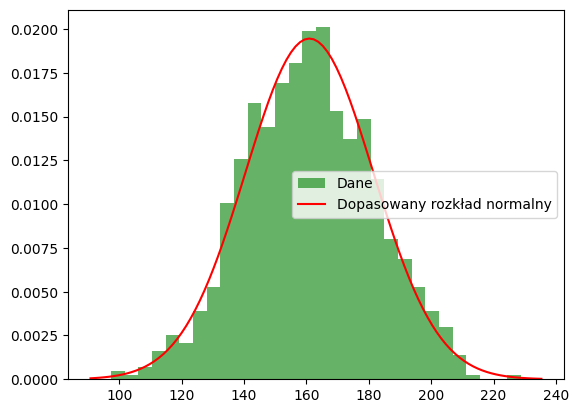

In [87]:
# Tworzymy histogram danych
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Dane")

# Rysujemy wykres dopasowanego rozkładu normalnego
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = stats.norm.pdf(x, mu_hat, sigma_hat)
plt.plot(x, pdf_fitted, 'r-', label="Dopasowany rozkład normalny")

plt.legend()
plt.show()

### BAYES I MAP

https://www.youtube.com/watch?v=HZGCoVF3YvM

https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348

Twierdzenie Bayesa opisuje sposób, w jaki możemy zaktualizować nasze przekonania o jakimś zdarzeniu (np. o jakimś parametrze) na podstawie nowych dowodów lub danych.

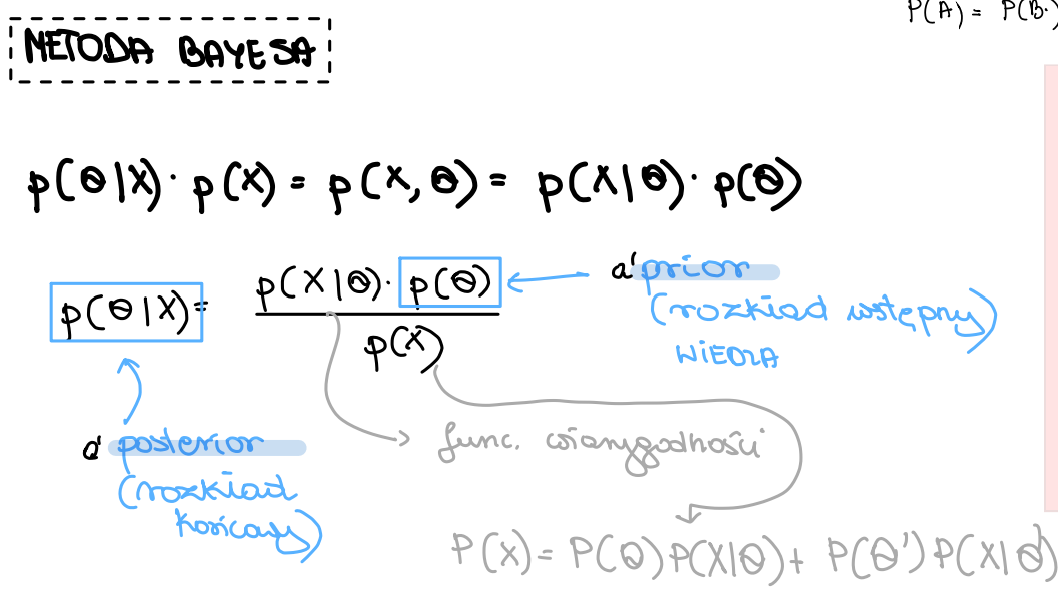

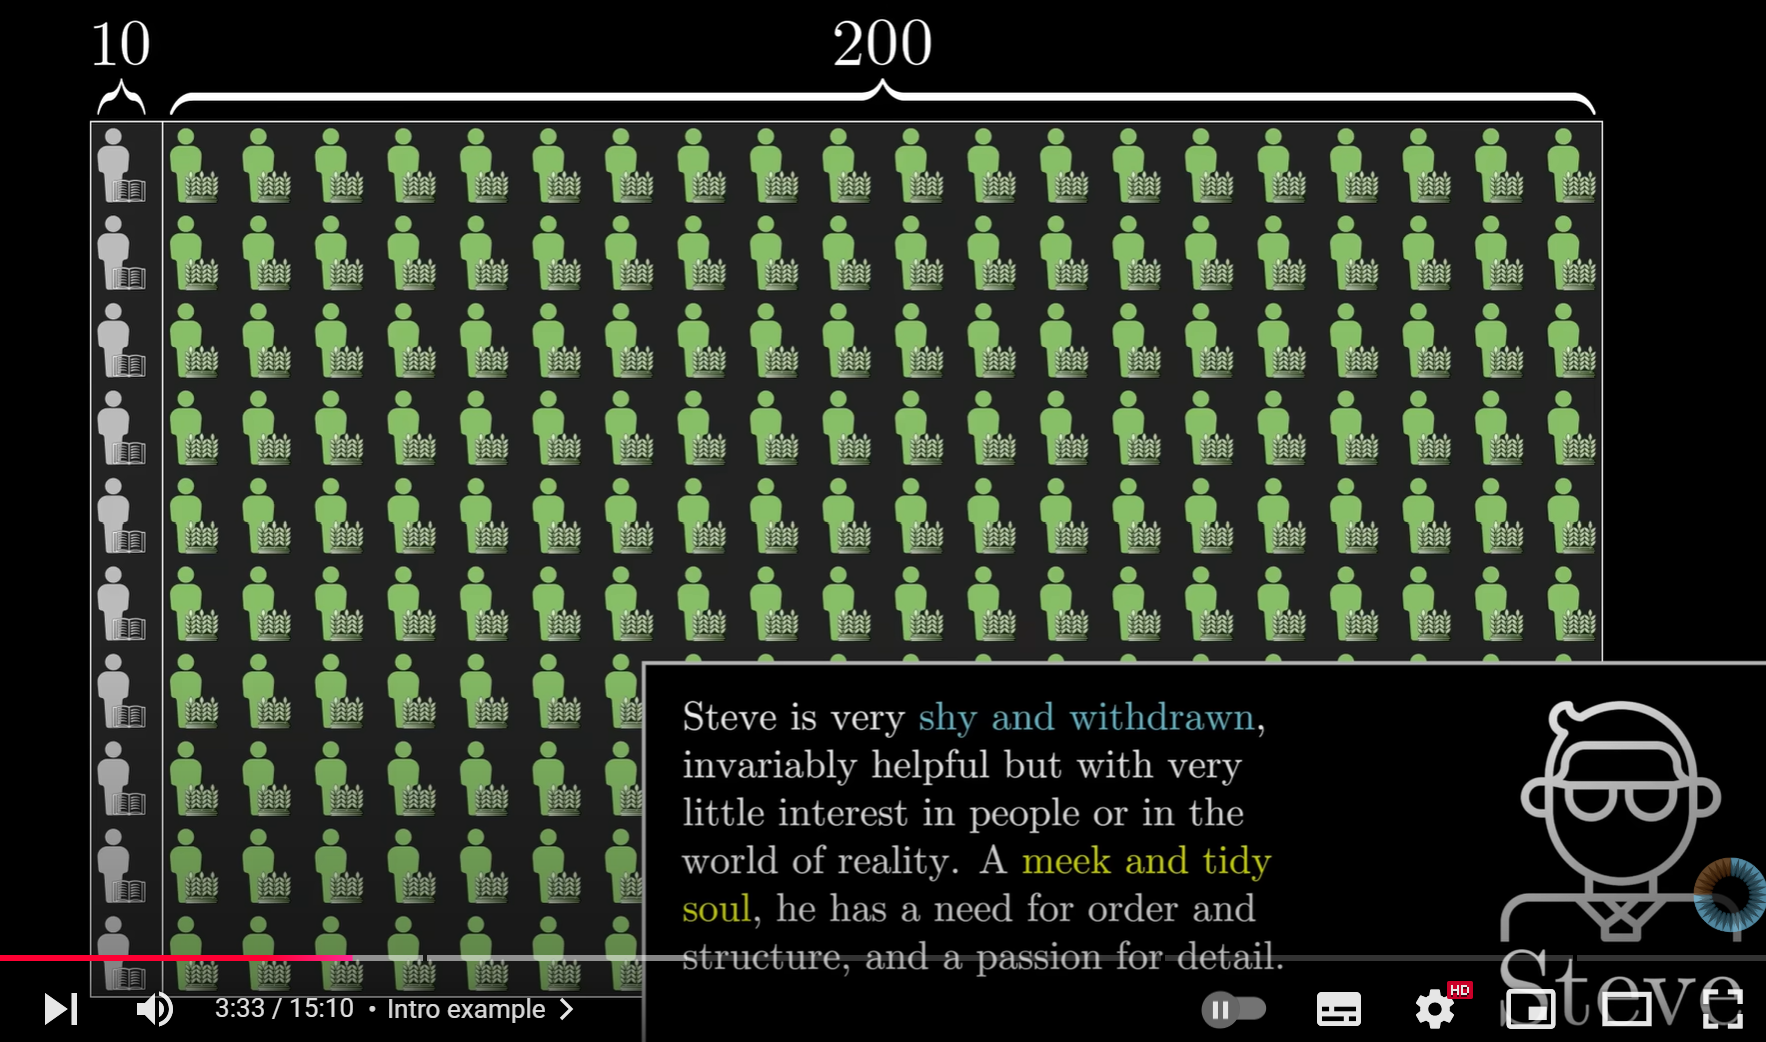

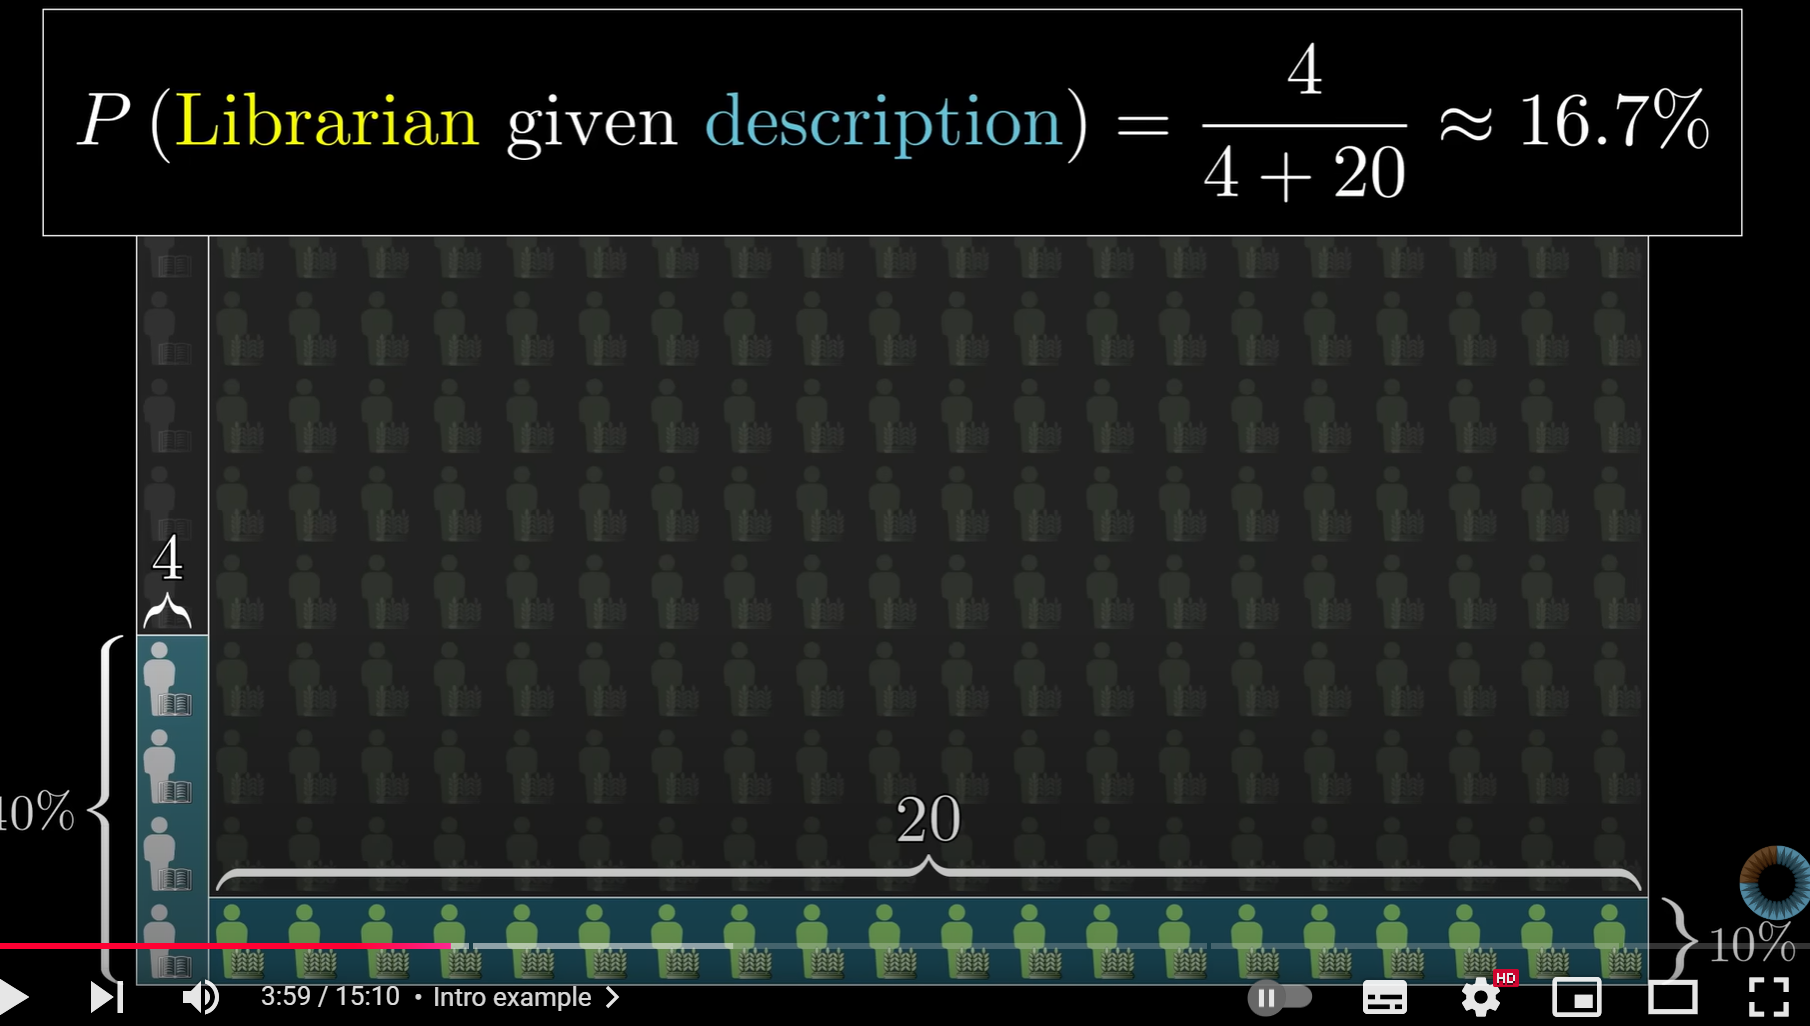

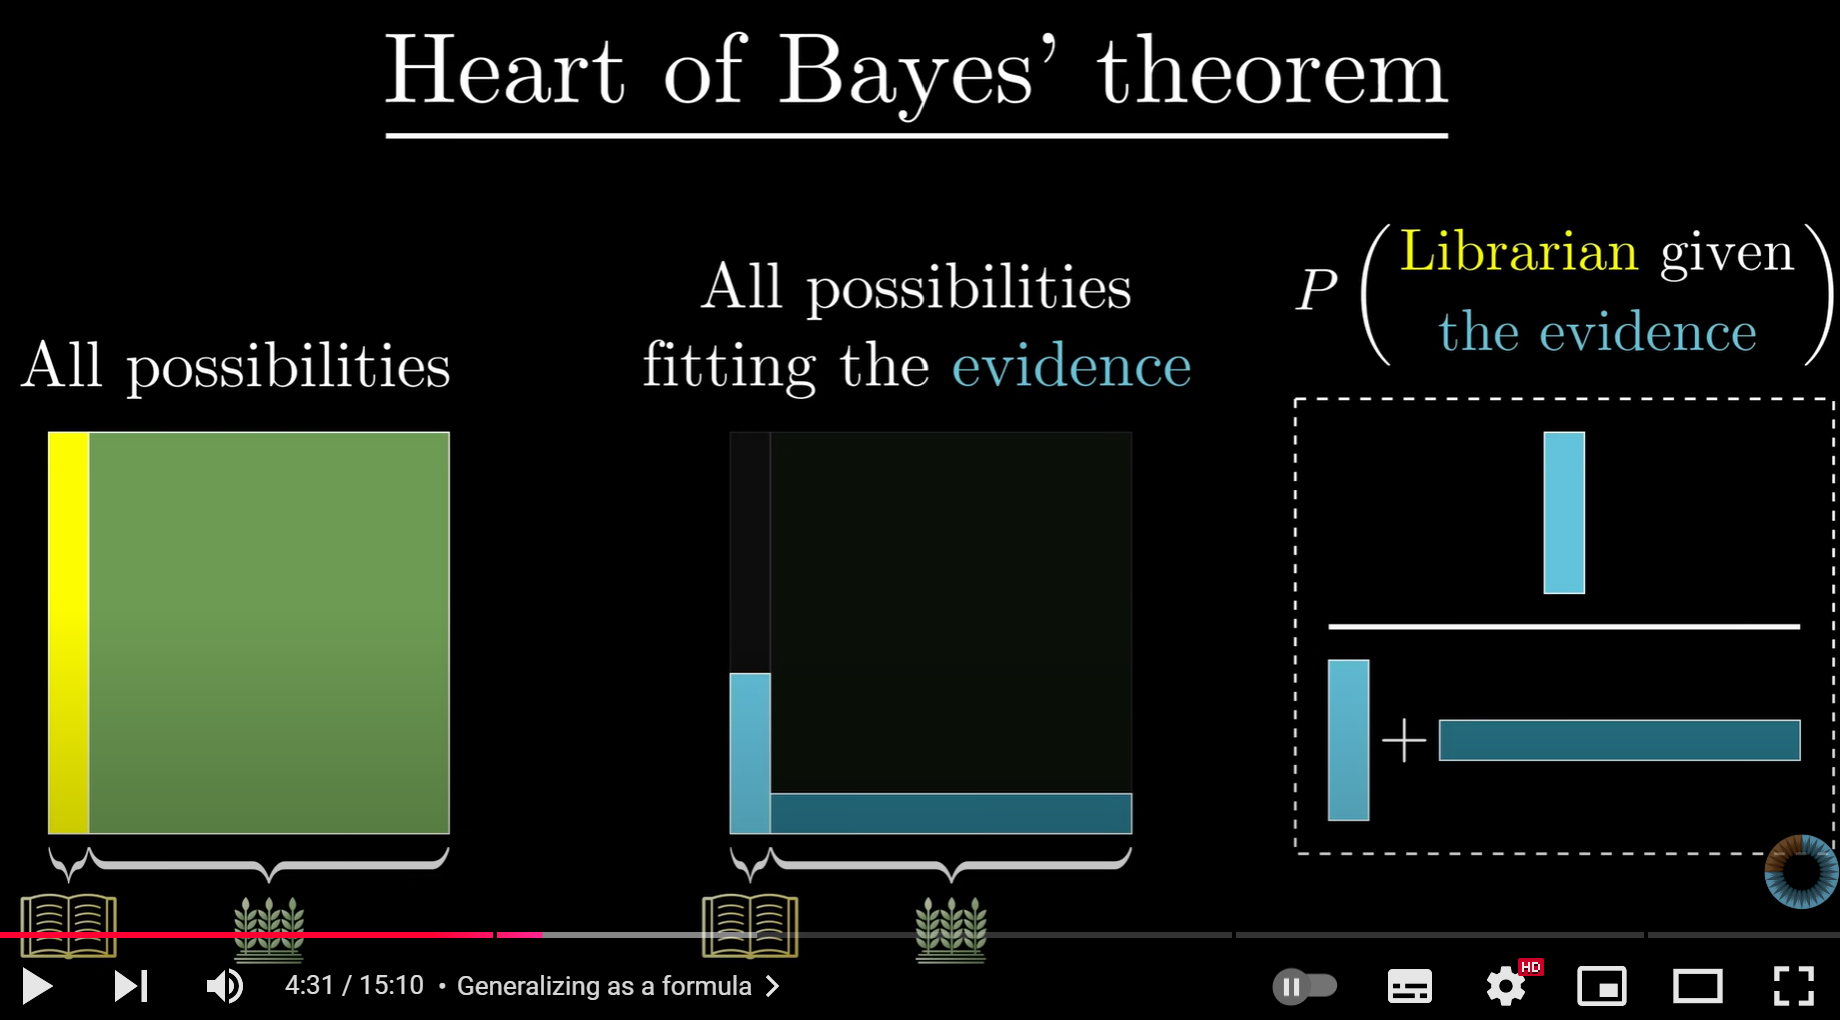

### Przykład z chorobą 

In [88]:
P_choroba = 0.01  # Prawdopodobieństwo, że pacjent ma chorobę (prior)
P_brak_choroby = 1 - P_choroba  # Prawdopodobieństwo, że pacjent nie ma choroby (prior)

# Czułość i specyficzność testu
P_pozytywny_test_choroba = 0.9  # Prawdopodobieństwo pozytywnego wyniku testu, jeśli pacjent ma chorobę
P_pozytywny_test_brak_choroby = 1 - 0.95  # Prawdopodobieństwo pozytywnego wyniku testu, jeśli pacjent nie ma choroby (1 - specyficzność)

# Prawdopodobieństwo pozytywnego wyniku testu (całkowite prawdopodobieństwo)
P_pozytywny_test = (P_pozytywny_test_choroba * P_choroba) + (P_pozytywny_test_brak_choroby * P_brak_choroby)

# Prawdopodobieństwo, że pacjent ma chorobę po pozytywnym wyniku testu (posterior)
P_choroba_po_test = (P_pozytywny_test_choroba * P_choroba) / P_pozytywny_test

print(f"Prawdopodobieństwo, że pacjent ma chorobę po pozytywnym wyniku testu: {P_choroba_po_test:.4f}")


Prawdopodobieństwo, że pacjent ma chorobę po pozytywnym wyniku testu: 0.1538


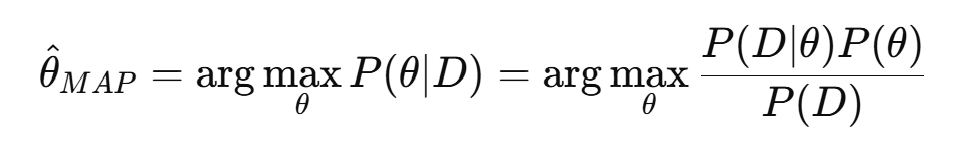

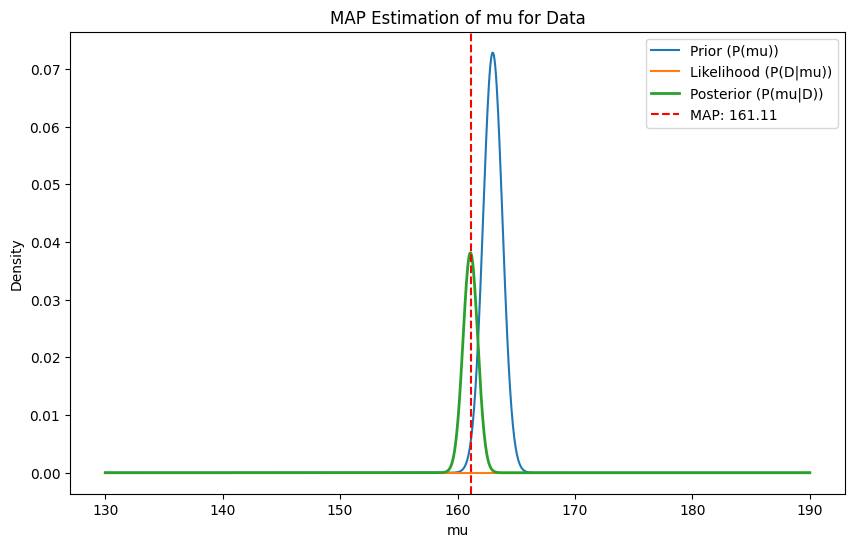

Szacowana wartość mu (MAP): 161.11


In [104]:

sigma_square = 20**2  # Zmienna ta to wariancja (sigma^2)
n = len(data)  # Liczba obserwacji

# Założenie o rozkładzie a priori P(mu)
prior_mean = 170  # Średnia rozkładu a priori
prior_variance = 30
prior = norm.pdf(np.linspace(-50, 350, 1000), loc=prior_mean, scale=np.sqrt(prior_variance))

# Funkcja wiarygodności P(D | mu) - rozkład normalny
mu_values = np.linspace(130, 190, 1000)
likelihood = np.exp(-0.5 * np.sum((data - mu_values[:, None]) ** 2 / sigma_square, axis=1))

# Funkcja posteriori P(mu | D)
posterior = likelihood * norm.pdf(mu_values, loc=prior_mean, scale=np.sqrt(prior_variance))

# Normalizacja, aby uzyskać prawdziwe P(mu | D)
posterior /= np.sum(posterior)

# Maksymalizacja posteriori (MAP)
mu_MAP = mu_values[np.argmax(posterior)]

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(mu_values, prior, label="Prior (P(mu))")
plt.plot(mu_values, likelihood, label="Likelihood (P(D|mu))")
plt.plot(mu_values, posterior, label="Posterior (P(mu|D))", linewidth=2)
plt.axvline(mu_MAP, color='r', linestyle='--', label=f'MAP: {mu_MAP:.2f}')
plt.legend()
plt.title('MAP Estimation of mu for Data')
plt.xlabel('mu')
plt.ylabel('Density')
plt.show()

print(f"Szacowana wartość mu (MAP): {mu_MAP:.2f}")


# Przypadki użycia ML

### ML w regresji

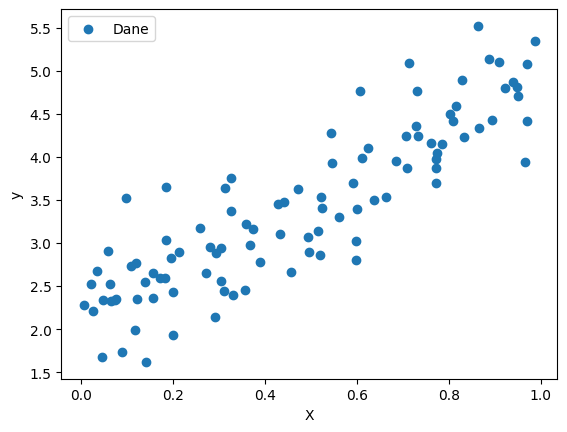

In [90]:
# Generowanie danych
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 próbek jednowymiarowych
y = 3 * X + 2 + np.random.normal(0, 0.5, (100, 1))  # Wzór: y = 3 * X + 2 + szum

# Dodanie kolumny jedynek do X (wyraz wolny)
X_ = np.hstack([np.ones((X.shape[0], 1)), X])

plt.scatter(X, y, label='Dane')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Zakładamy że szum ma średnią 0 

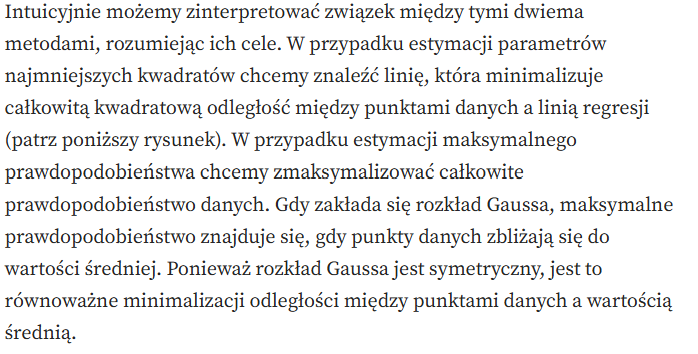

POLECANKA FEST -> https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

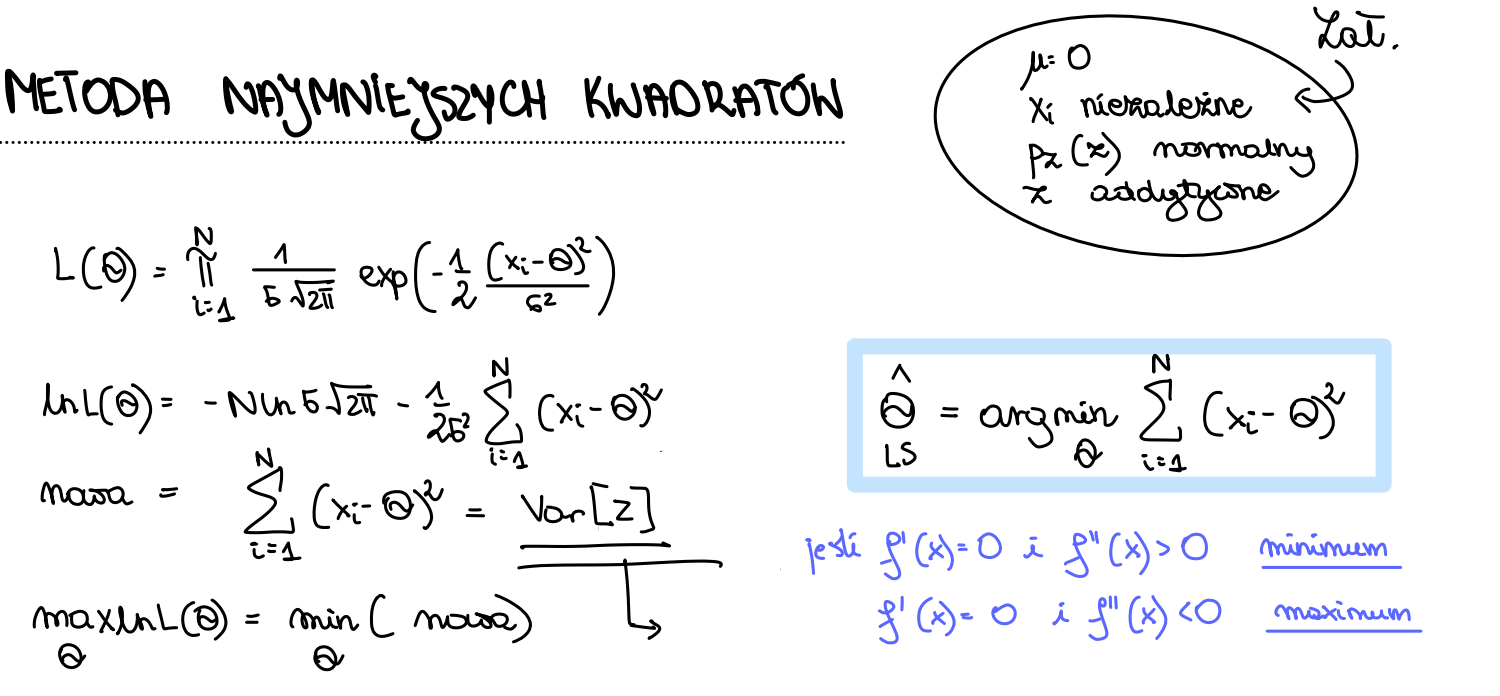

### ML w cross entropy 

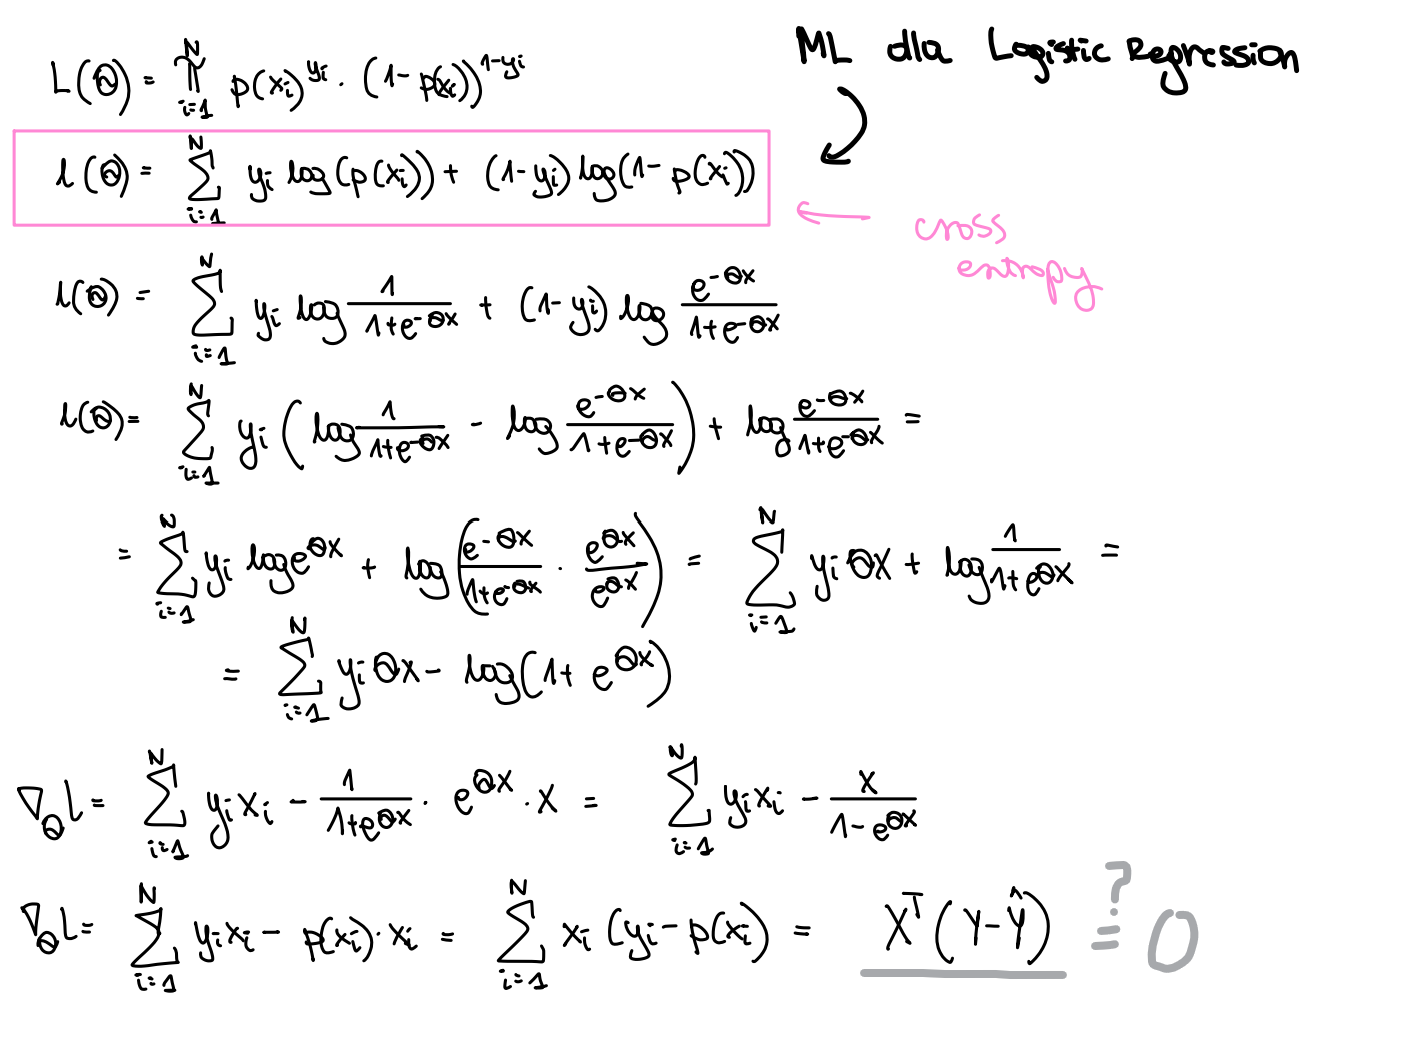

# Centralne tw graniczne

Twierdzenie to mówi, że suma (lub średnia) dużej liczby niezależnych, identycznie rozkładowych zmiennych losowych (o skończonej wartości oczekiwanej i wariancji) ma rozkład zbliżony do rozkładu normalnego, niezależnie od kształtu pierwotnego rozkładu.


https://www.youtube.com/watch?v=_YOr_yYPytM

https://www.youtube.com/watch?v=Ux9bQJ1NZFc

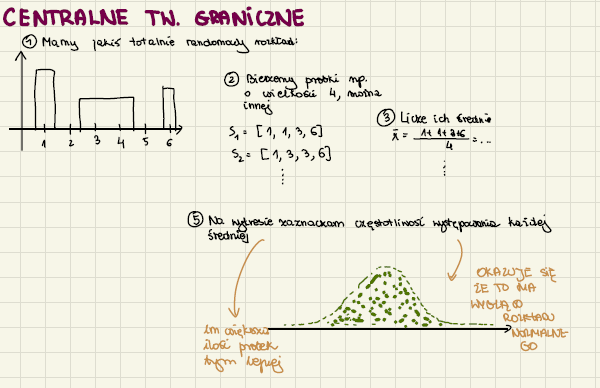

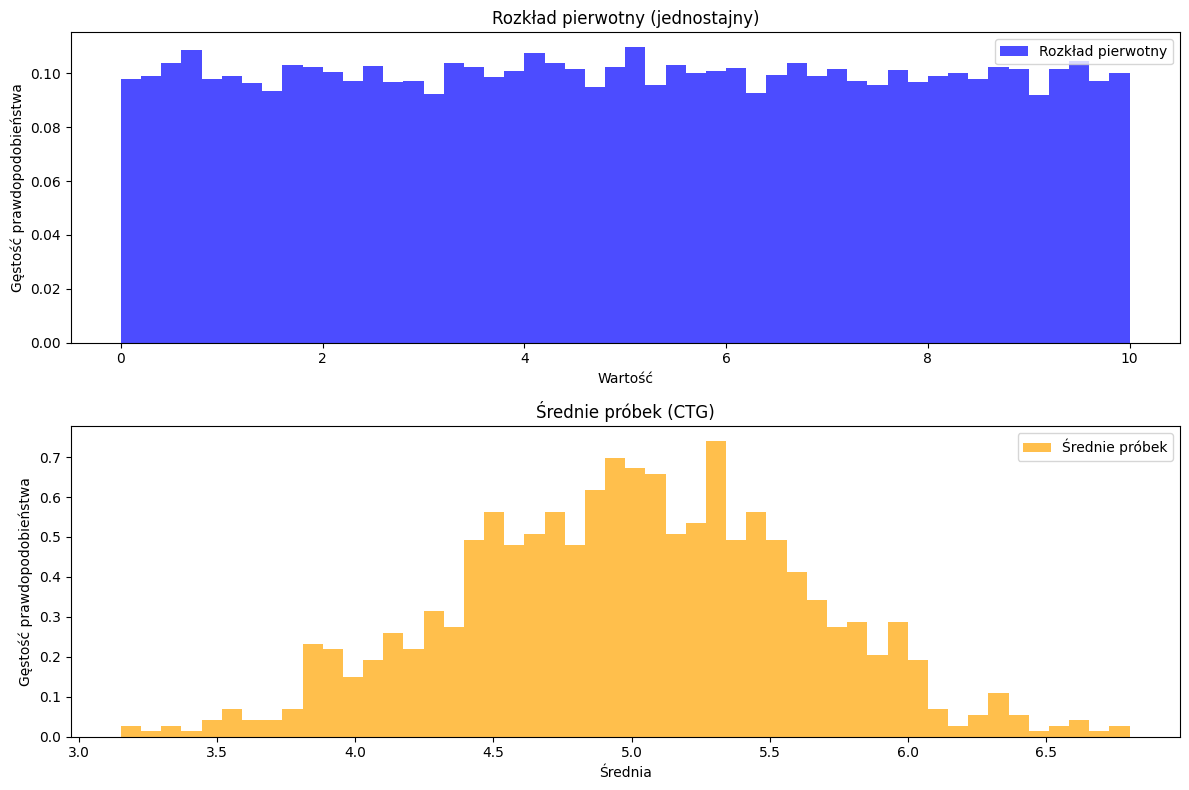

In [91]:
# Liczba próbek w każdej próbce i liczba powtórzeń
n_samples = 20  # Rozmiar każdej próbki
n_repeats = 1000  # Liczba powtórzeń (średnich)

# Rozkład pierwotny (np. jednostajny)
low, high = 0, 10  # Zakres wartości rozkładu jednostajnego
original_data = np.random.uniform(low, high, (n_repeats, n_samples))

# Liczenie średnich z próbek
means = np.mean(original_data, axis=1)

# Tworzenie wykresów
plt.figure(figsize=(12, 8))

# Histogram oryginalnego rozkładu
plt.subplot(2, 1, 1)
plt.hist(original_data.flatten(), bins=50, density=True, alpha=0.7, color="blue", label="Rozkład pierwotny")
plt.title("Rozkład pierwotny (jednostajny)")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()

# Histogram średnich
plt.subplot(2, 1, 2)
plt.hist(means, bins=50, density=True, alpha=0.7, color="orange", label="Średnie próbek")
plt.title("Średnie próbek (CTG)")
plt.xlabel("Średnia")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()

plt.tight_layout()
plt.show()

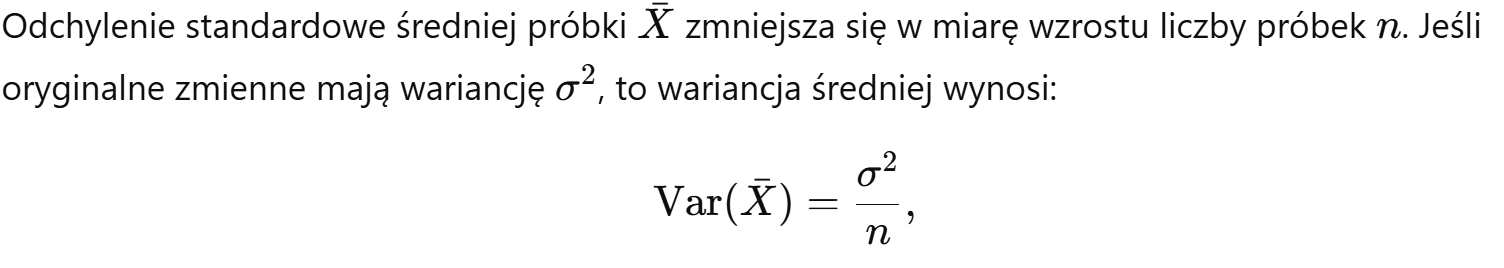

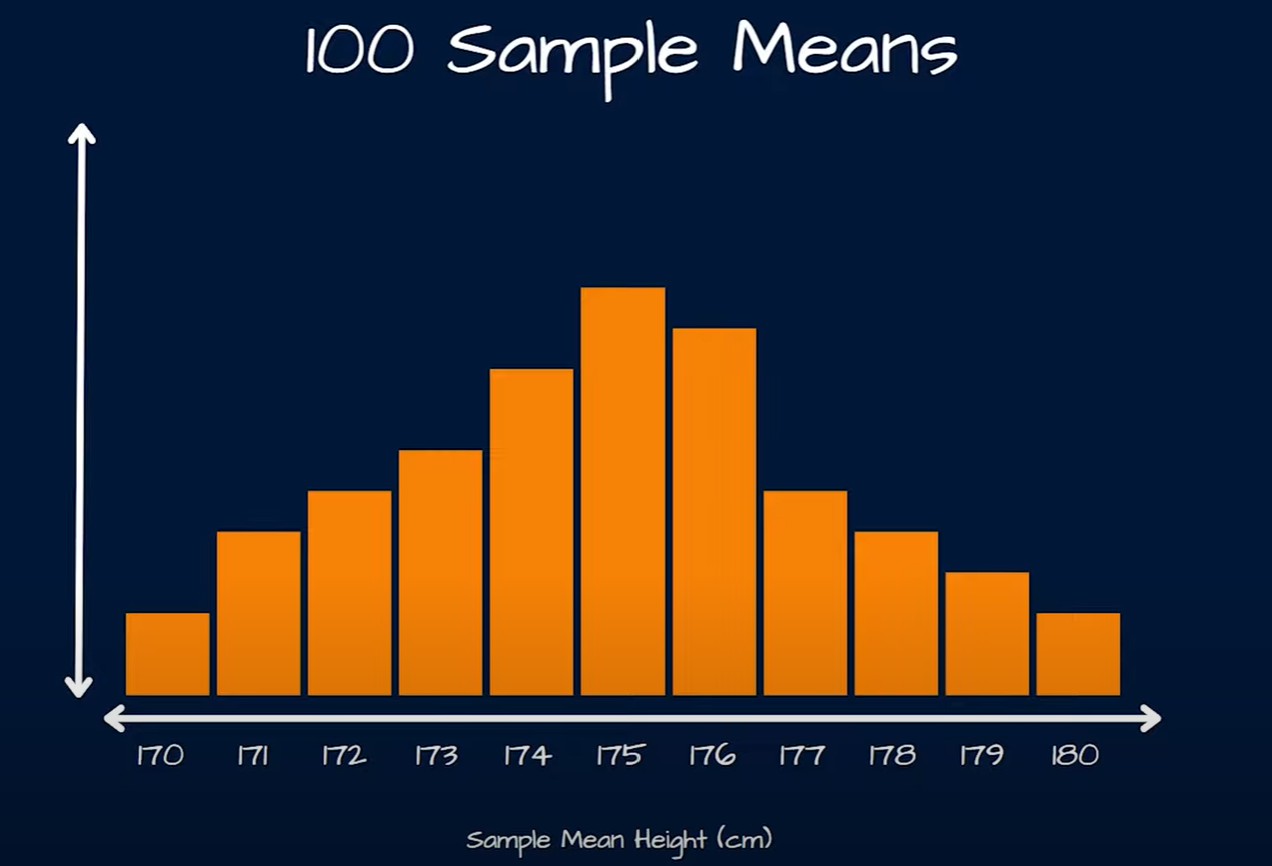

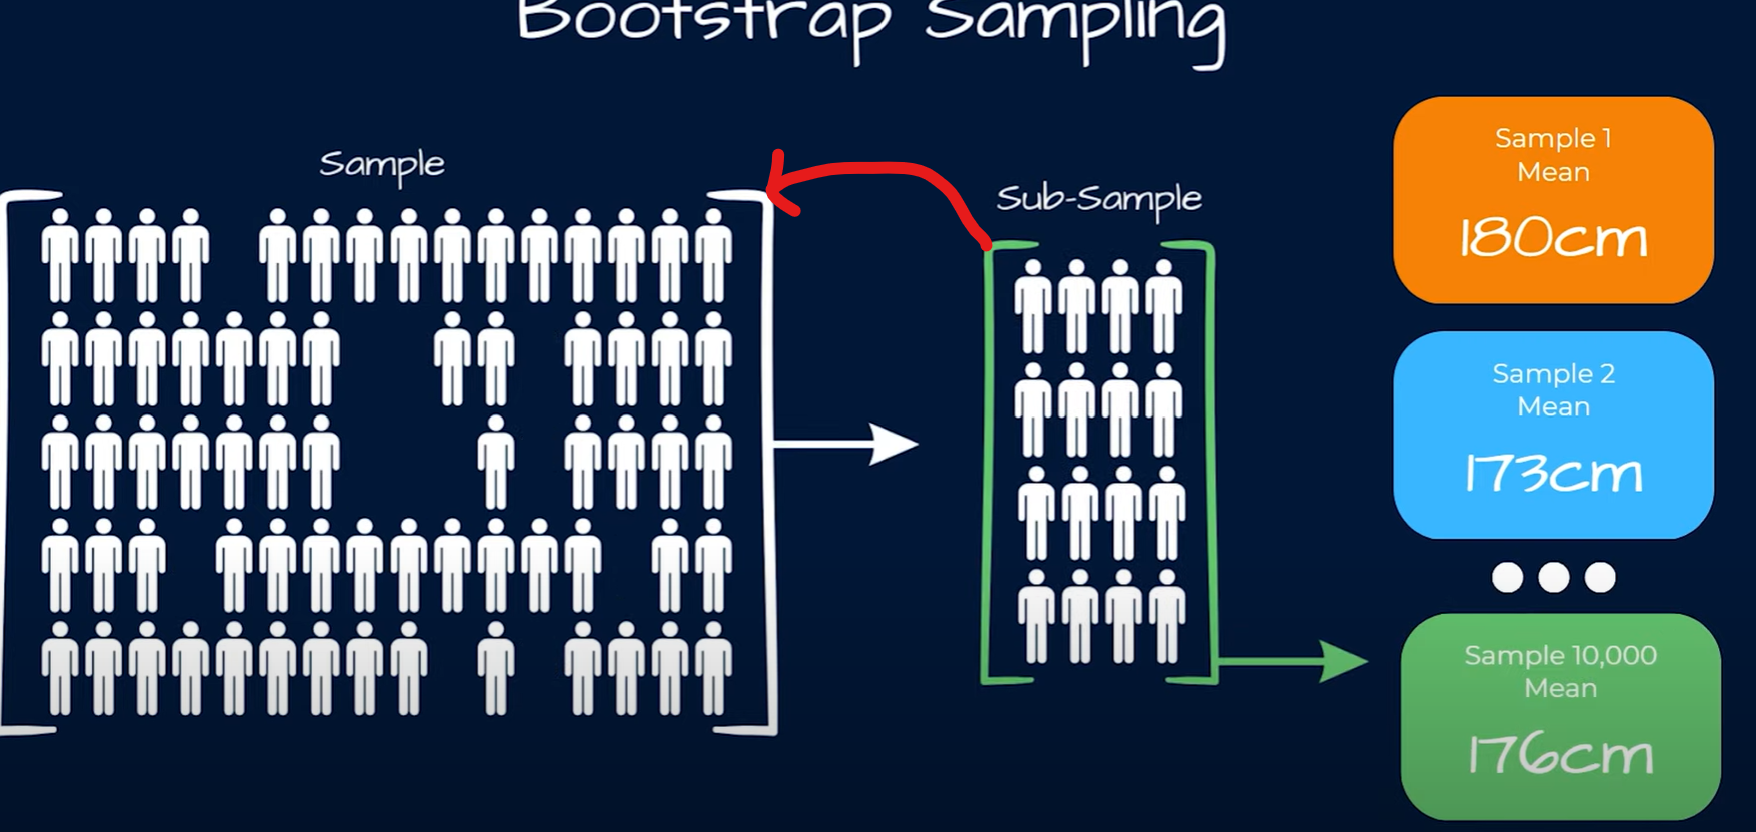

# Przedziały ufności

Przedziały ufności (ang. confidence intervals) są narzędziem statystycznym używanym do oszacowania zakresu wartości, w którym z określonym poziomem pewności (ufności) znajduje się prawdziwa wartość parametru populacji, takiego jak średnia, odchylenie standardowe czy proporcja.

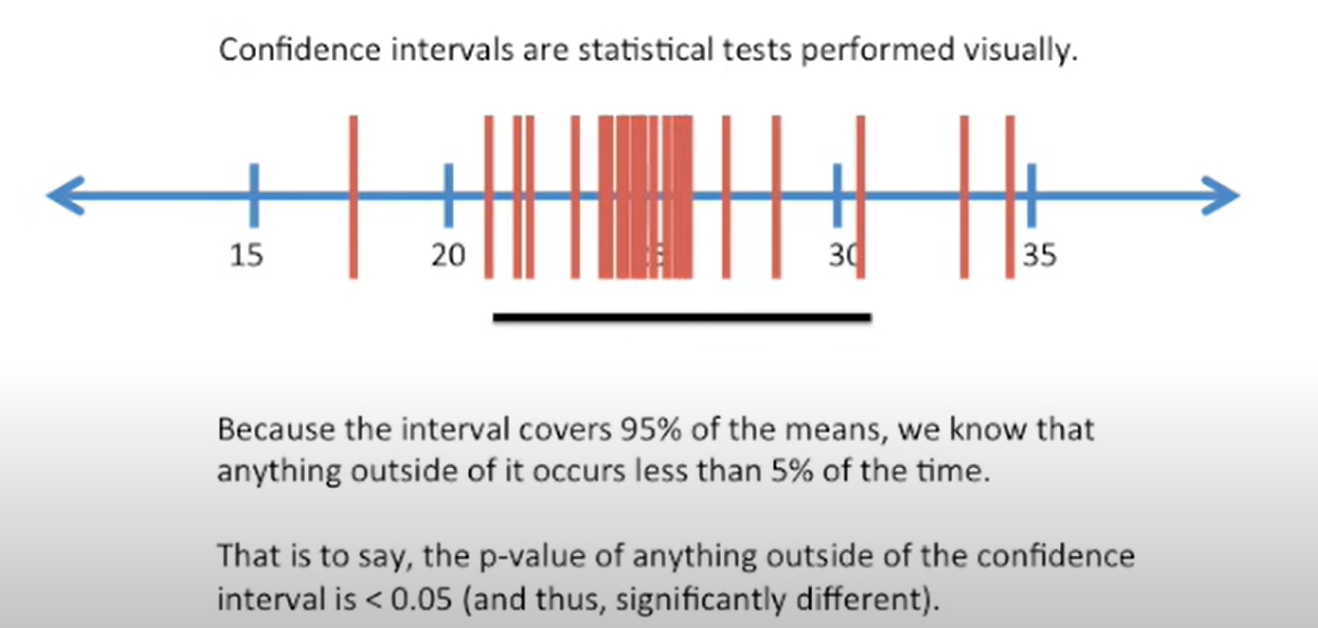

Jeśli poziom ufności mamy 95% to alpha to 1-0.95 = 0.05 

W tablicy sprawdzamy wartość 1- alpha/2 = 1 - 0.025 = 0.075 

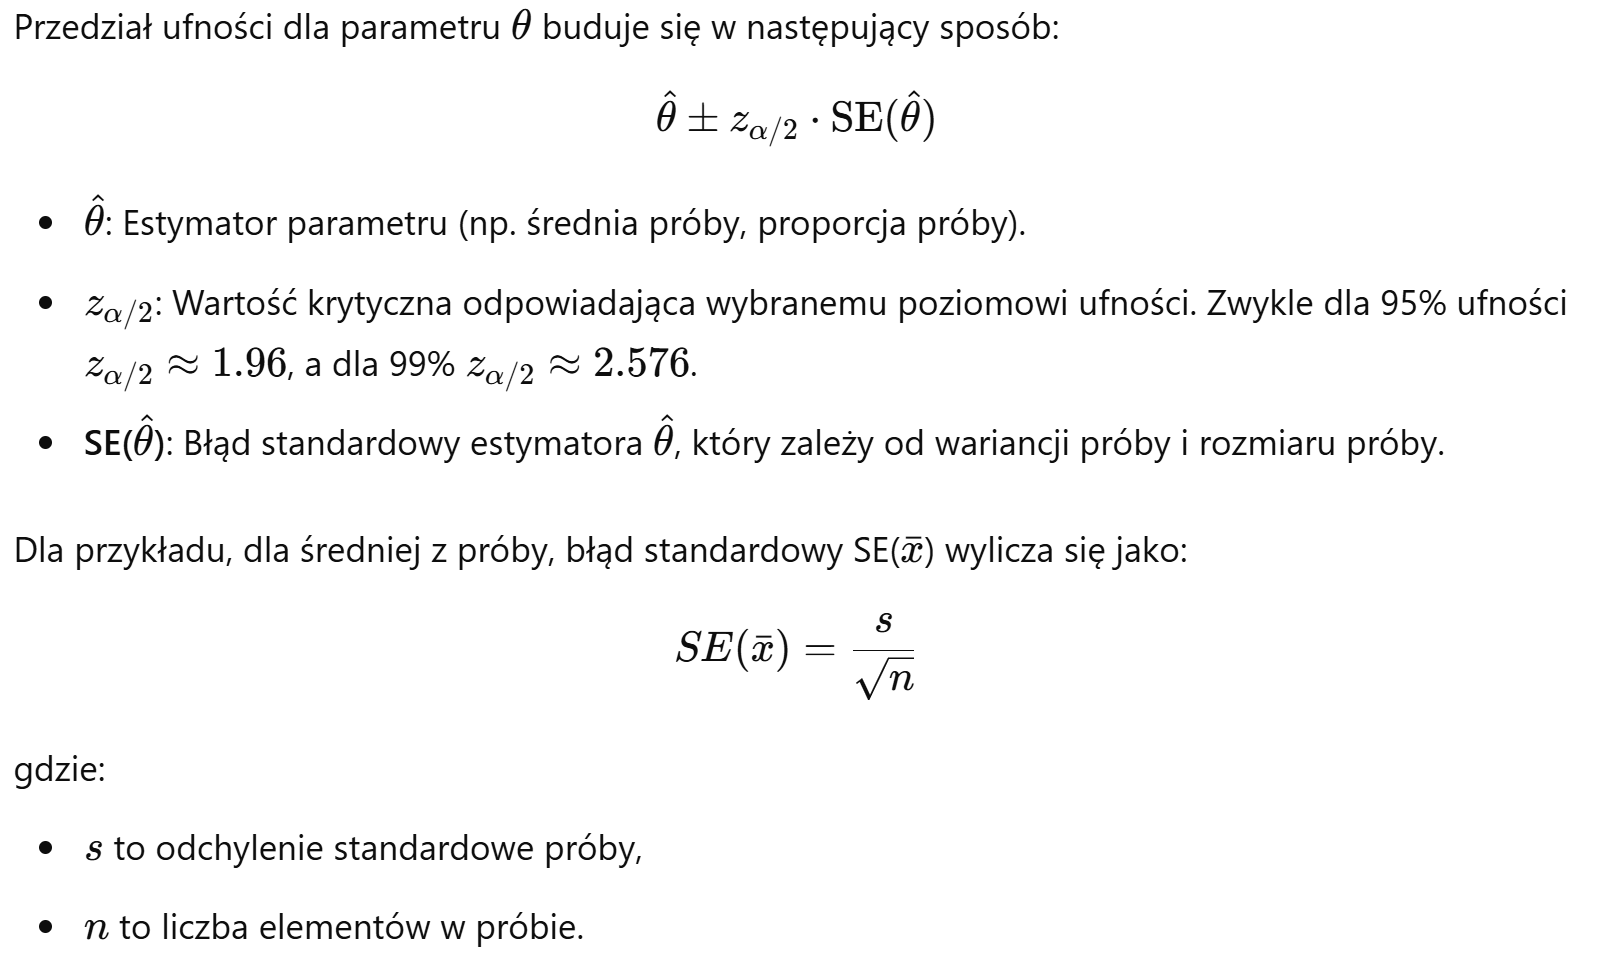

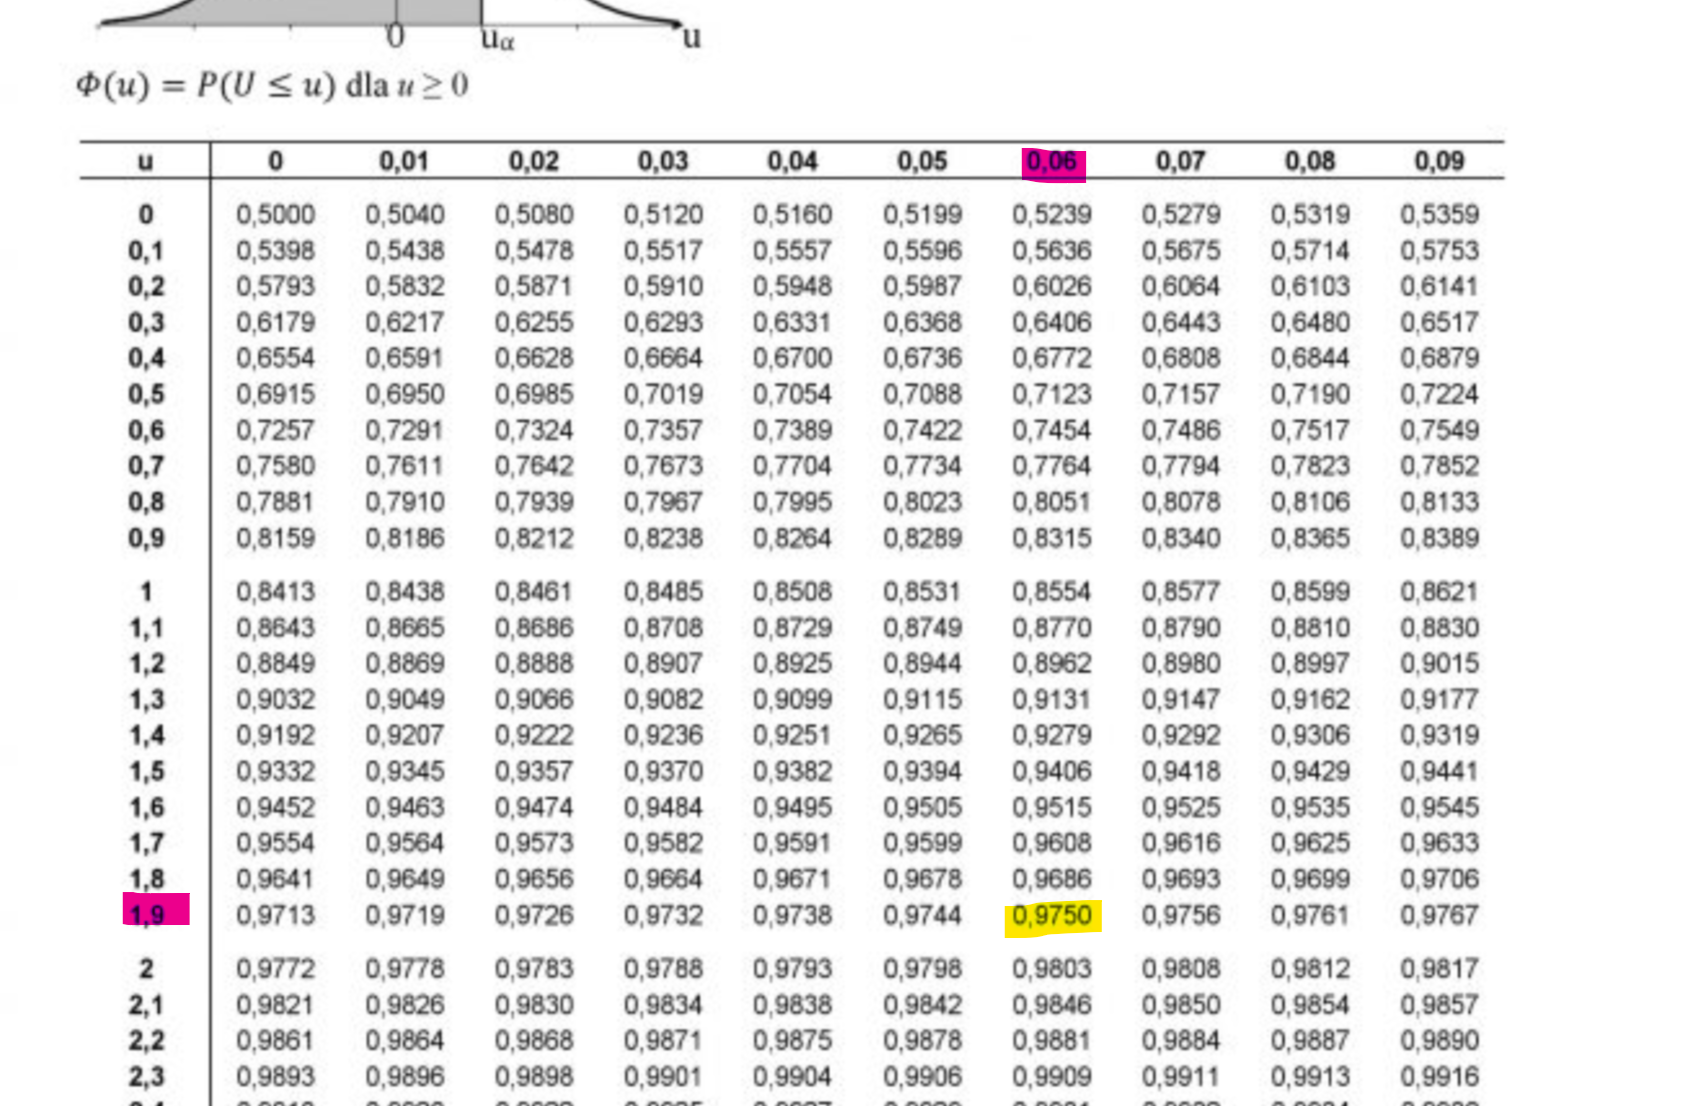